<a href="https://colab.research.google.com/github/Irina-64/AI_University/blob/main/%D0%A2%D1%80%D1%83%D0%B1%D1%87%D0%B8%D0%BA%D0%98%D0%A1_%D0%94%D0%97_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорт библиотек

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive
import pandas as pd
%matplotlib inline

### Загрузка базы mnist.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Выводим для примера картинки по каждому классу

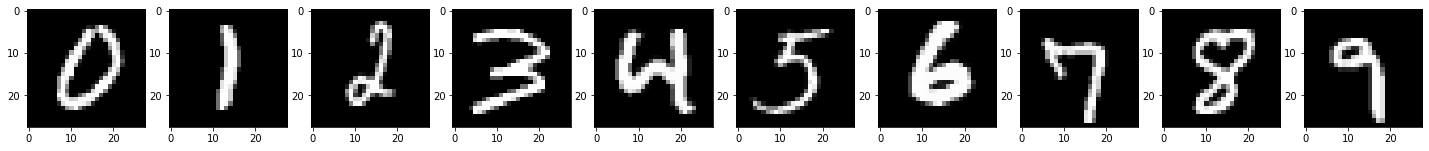

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

### Нормирование и преобразование x_train и y_train.

In [ ]:
#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Превращаем y_train и y_test в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


### Создание сверточной нейронной сети.

### задаём batch_size

In [ ]:
batch_size = 128 

### Создаем последовательную модель

In [ ]:
model = Sequential()

### Собираем нейросеть из набора слоев (послеовательных)

In [ ]:
model.add(BatchNormalization(input_shape=(28, 28, 1)))  #Слой пакетной нормализации
model.add(Conv2D(32, 3, padding='same', activation='relu')) #Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) #Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) #Первый слой подвыборки
model.add(Dropout(0.25))  #Слой регуляризации Dropout

model.add(Flatten())
model.add(Dense(256, activation='relu')) #Полносвязный слой для классификации
model.add(Dropout(0.25))  #Слой регуляризации Dropout
model.add(Dense(10, activation='softmax'))  #Выходной полносвязный слой

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Обучение сверточной нейронной сети.

Epoch 1/15
469/469 [==============================] - 29s 8ms/step - loss: 0.1834 - accuracy: 0.9438 - val_loss: 0.0443 - val_accuracy: 0.9845
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.0411 - val_accuracy: 0.9853
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0315 - val_accuracy: 0.9892
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0278 - val_accuracy: 0.9903
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0273 - val_accuracy: 0.9912
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0253 - val_accuracy: 0.9925
Epoch

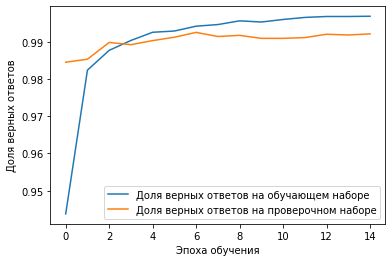

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# LIght Вариант 2

Провести серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии.

Поменять количество нейронов в сверточных слоях, использовав следующие значения:
* один слой 2 фильтров
* один слой  4 фильтров
* один слой  16 фильтров

Поменять активационную функцию в скрытых слоях с relu на linear

Поменять размеры batch_size:
* 10
* 100
* Вся база (48000)

Записать в таблицу получившиеся точности.
Написать выводы по результатам проведенных тестов.


In [ ]:
data = [['32-32', 'relu', 128, round(history.history['val_accuracy'][-1], 3)]]
data

[['32-32', 'relu', 128, 0.993]]

In [ ]:
# 1

N = [2, 4, 16] # Кол-во фильтров в сверточных слоях

for i in N:
    for j in N[::-1]:
        model = Sequential()

        model.add(BatchNormalization(input_shape=(28, 28, 1)))
        model.add(Conv2D(i, (3, 3), padding='same', activation='relu')) # Меняем кол-во фильтров в сверточных слоях
        model.add(Conv2D(j, (3, 3), padding='same', activation='relu')) 
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.25))
        model.add(Dense(10, activation='softmax'))

        # Компилируем сеть
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        # Обучаем сеть 
        history = model.fit(x_train, 
                            y_train, 
                            batch_size=batch_size, 
                            epochs=10,
                            validation_split=0.2,
                            verbose=1)
        
        mod =str(i)+'-'+str(j)
        data = data + [[mod, 'relu', 128, round(history.history['val_accuracy'][-1], 3)]]


# 2

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='linear')) # Меняем активационную функцию на linear
model.add(Conv2D(32, (3, 3), padding='same', activation='linear')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='linear'))                         # Меняем активационную функцию на linear
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Обучаем сеть 
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

data = data + [['32-32', 'linear', 128, round(history.history['val_accuracy'][-1], 3)]]


# 3.1

N_batch_size = [10, 100, 15000]
for i in N_batch_size:
    model = Sequential()

    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    # Компилируем сеть
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Обучаем сеть 
    history = model.fit(x_train, 
                        y_train, 
                        batch_size=i,               # Меняем batch_size
                        epochs=10,
                        validation_split=0.2,
                        verbose=1)

    data = data + [['32-32', 'relu', i, round(history.history['val_accuracy'][-1], 3)]]

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2540 - accuracy: 0.9209 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0875 - accuracy: 0.9734 - val_loss: 0.0584 - val_accuracy: 0.9833
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0475 - val_accuracy: 0.9860
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0452 - accuracy: 0.9851 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9878 - val_loss: 0.0459 - val_accuracy: 0.9868
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.0435 - val_accuracy: 0.9872
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 

In [ ]:
# чистим оперативную память
import gc    
gc.collect()

88

In [ ]:
# 3.2 batch_size=48000

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Обучаем сеть 
history = model.fit(x_train, 
                    y_train, 
                    batch_size=48000, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
df = pd.DataFrame(data, columns = ['filtres', 'activation', 'batch_size','val_accuracy'])
df

NameError: ignored

In [ ]:
# Выводы:

# Выводы:
### Добавление количества фильтров существенно не влияет на точность НС
### увеличение batch_size выше 10000 может ухудшить ситуацию, но появилась гипотеза о том, что это может быть связано с нехваткой оп. памяти в коллабе, поскольку обучение по batch_size=48000 вызывает ситуацию переполнения стека. Чистка ОЗУ не помогает

# Pro Вариант 2

Добейтесь точности 90% на проверочной выборке на базе Cifar10. Размер проверочной выборки - 20%.


In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

# Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# Превращаем y_train и y_test в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
def create_model():
    model = Sequential()
    # 1
    model.add(BatchNormalization(input_shape=(32,32,3)))
    model.add(Conv2D(1024, 3, padding='same', activation='relu'))
    model.add(Conv2D(1024, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))
    # 2
    model.add(BatchNormalization())
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(Conv2D(512, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))
    # 3
    model.add(BatchNormalization())
    model.add(Conv2D(256, 3, padding='same', activation='relu'))
    model.add(Conv2D(256, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))
    # 4
    model.add(BatchNormalization())
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))
    # 5
    model.add(BatchNormalization())
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Dropout(0.4))
    # 6
    model.add(BatchNormalization())
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))

    # Выходной полносвязный слой
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
# Генератор изображений
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20) 

# Обучаем модель в пакетном режиме с дополнением данных в реальном времени
datagen_train.fit(x_train10)  

In [ ]:
batch_size = 128 # Размер батча
steps_per_epoch = len(x_train10) // batch_size # Общее количество шагов (партий образцов)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40
390/390 [==============================] - 381s 849ms/step - loss: 1.7915 - accuracy: 0.3153 - val_loss: 2.3804 - val_accuracy: 0.3204
Epoch 2/40
390/390 [==============================] - 308s 790ms/step - loss: 1.3634 - accuracy: 0.5044 - val_loss: 1.2614 - val_accuracy: 0.5602
Epoch 3/40
390/390 [==============================] - 307s 788ms/step - loss: 1.1357 - accuracy: 0.6045 - val_loss: 1.0606 - val_accuracy: 0.6359
Epoch 4/40
390/390 [==============================] - 306s 785ms/step - loss: 0.9684 - accuracy: 0.6682 - val_loss: 0.8531 - val_accuracy: 0.6994
Epoch 5/40
390/390 [==============================] - 305s 781ms/step - loss: 0.8731 - accuracy: 0.7087 - val_loss: 0.8768 - val_accuracy: 0.7074
Epoch 6/40
390/390 [==============================] - 304s 780ms/step - loss: 0.8024 - accuracy: 0.7361 - val_loss: 0.7520 - val_accuracy: 0.7462
Epoch 7/40
390/390 [==============================] - 303s 778ms/step - loss: 0.7355 - accuracy: 0.7606 - val_loss: 0.7854 -

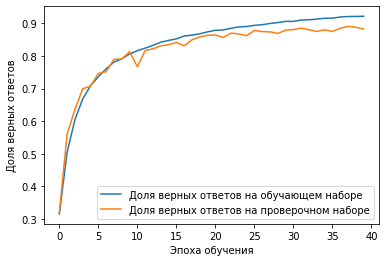

In [ ]:
# Создаем модель
model = create
_model()

# Компилируем сеть
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Обучаем сеть
history = model.fit(datagen_train.flow(x_train10, y_train10, batch_size=batch_size),    # В последних версиях можно указывать fit при работе с генератором
                    steps_per_epoch=steps_per_epoch, 
                    epochs=40, 
                    validation_data=datagen_train.flow(x_test10, y_test10, batch_size=batch_size))


# Отображаем график точности обучения
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### расчеты занимают достаточно много времени. Точность увеличивается постепенно и после 30й эпохи начинает превышать 90% - т.е. решает поставленную в задании задачу. Общее время обучения = 3 ч. 28 мин.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
390/390 [==============================] - 299s 763ms/step - loss: 0.1923 - accuracy: 0.9389 - val_loss: 0.3188 - val_accuracy: 0.9038
Epoch 2/20
390/390 [==============================] - 297s 762ms/step - loss: 0.1763 - accuracy: 0.9442 - val_loss: 0.3203 - val_accuracy: 0.9023
Epoch 3/20
390/390 [==============================] - 296s 760ms/step - loss: 0.1666 - accuracy: 0.9470 - val_loss: 0.3161 - val_accuracy: 0.9038
Epoch 4/20
390/390 [==============================] - 297s 761ms/step - loss: 0.1612 - accuracy: 0.9468 - val_loss: 0.3062 - val_accuracy: 0.9054
Epoch 5/20
390/390 [==============================] - 297s 761ms/step - loss: 0.1557 - accuracy: 0.9494 - val_loss: 0.3129 - val_accuracy: 0.9061
Epoch 6/20
390/390 [==============================] - 297s 762ms/step - loss: 0.1519 - accuracy: 0.9506 - val_loss: 0.3007 - val_accuracy: 0.9077
Epoch 7/20
390/390 [==============================] - 296s 760ms/step - loss: 0.1503 - accuracy: 0.9508 - val_loss: 0.2982 -

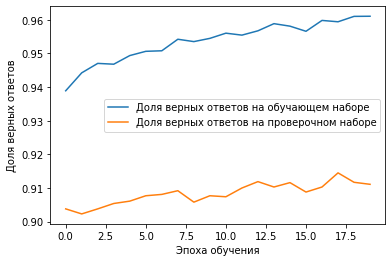

In [ ]:
batch_size = 128 # Размер батча
steps_per_epoch = len(x_train10) // batch_size # Общее количество шагов (партий образцов)

# Компилируем сеть
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
# Обучаем сеть
history = model.fit(datagen_train.flow(x_train10, y_train10, batch_size=batch_size),  # В последних версиях можно указывать fit при работе с генератором
                    steps_per_epoch=steps_per_epoch, 
                    epochs=20, 
                    validation_data=datagen_train.flow(x_test10, y_test10, batch_size=batch_size))


# Отображаем график точности обучения
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 1024)      28672     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 1024)      9438208   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 1024)      0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 1024)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 1024)      4096      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 512)       4

### уменьшение параметра lr в оптимайзере adam в 10 раз по сравнению с предыдущим экспериментом позволяет уменьшить количество эпох обучения в 2 раза, что значительно сокращает время обучения с 3,5 часов до 1,5 часов

# Pro Вариант 3

Добейтесь точности не менее 90% на проверочной выборке на базе трех иномарок. Размер проверочной выборки - 20%.

данное задание прийдется выполнить в новом аккаунте из-за ограничений коллаба